# CSAL4243: Introduction to Machine Learning
Muhammad Mudassir Khan (mudasssir.khan@ucp.edu.pk)

# Lecture 5: Multivariate Regression

### Overview

- [Machine Learning pipeline](#Machine-Learning-pipeline)
- [Linear Regression with one variable](#Linear-Regression-with-one-variable)
    - [Model Representation](#Model-Representation)
    - [Vectorize Model](#Vectorize-Model)
- [Linear Regression with multiple variables](#Linear-Regression-with-multiple-variables)
    - [Cost Function](#Cost-Function)
    - [Gradient Descent](#Gradient-Descent)
- [Speed up gradient descent](#Speed-up-gradient-descent)
    - [Feature Scaling](#Feature-Scaling)
    - [Mean Normalization](#Mean-Normalization)
    - [Combining Both](#Combining-Both)
    - [Learning Rate $\alpha$](#Learning-Rate-$\alpha$)
    - [Automatic Covergence Test](#Automatic-Covergence-Test)
- [Linear Regression with Multiple Variables Example](#Linear-Regression-with-Multiple-Variables-Example)
    - [Read data](#Read-data)
    - [Feature Scaling and Mean Normalization](#Feature-Scaling-and-Mean-Normalization)
    - [Initialize Hyper Parameters](#Initialize Hyper Parameters)
    - [Model/Hypothesis Function](#Model/Hypothesis-Function)
    - [Cost Function](#Cost-Function)
    - [Gradient Descent](#Gradient-Descent)
    - [Run Gradient Descent](#Run-Gradient-Descent)
    - [Plot Convergence](#Plot-Convergence)
    - [Predict output using trained model](#Predict-output-using-trained-model)
- [Resources](#Resources)
- [Credits](#Credits)

<br>
<br>

# Classification vs Regression

<img style="float: left;" src="images/05_05.jpg" width=300> <img style="float: center;" src="images/05_04.png" width=400>

<br>

# Machine Learning pipeline

<img style="float: left;" src="images/model.png">

- x is called input variables or input features.

- y is called output or target variable. Also sometimes known as label.

- h is called hypothesis or model. 

- pair (x<sup>(i)</sup>,y<sup>(i)</sup>) is called a sample or training example

- dataset of all training examples is called training set.

- m is the number of samples in a dataset.

- n is the number of features in a dataset excluding label.

<img style="float: left;" src="images/02_02.png", width=400> 

<br>
<br>

# Linear Regression with one variable

## Model Representation

- Model is represented by h<sub>$\theta$</sub>(x) or simply h(x)

- For Linear regression with one input variable h(x) =  $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x

<img style="float: left;" src="images/02_01.png">

- $\theta$<sub>0</sub> and $\theta$<sub>1</sub> are called weights or parameters.
- Need to find $\theta$<sub>0</sub> and $\theta$<sub>1</sub> that maximizes the performance of model.

<br>
## Vectorize Model

<img style="float: right;" src="images/02_02.png"  width=300>

- Write model in form of matrix multiplication
- $h(x)$ = $X \times \theta$
    - $X$ and $\theta$ are both matrices
    - $X = \left[ \begin{array}{cc}
x_1 \\
x_2 \\
x_3 \\
... \\
x_{m}
\end{array} \right]$
   

- $h(x)$ = $\theta_0 + \theta_1 x$ 
    = $X \times \theta$ = $\left[ \begin{array}{cc}
1 & x_i
\end{array} \right] \times \left[ \begin{array}{cc}
\theta_0 \\
\theta_1
\end{array} \right]$


- $h(x)$ = $\left[ \begin{array}{cc}
\theta_0 + \theta_1 x_1 \\
\theta_0 + \theta_1 x_2 \\
\theta_0 + \theta_1 x_3 \\
... \\
\theta_0 + \theta_1 x_{m} 
\end{array} \right] = \left[ \begin{array}{cc}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
... \\
1 & x_{m}
\end{array} \right] \times \left[ \begin{array}{cc}
\theta_0 \\
\theta_1
\end{array} \right]$


- In given dataset $X$ has dimensions $m \times 1$ because of 1 variable 
- $\theta$ has dimension $2\times 1$
- Append a column vector of all 1's to X
- New X has dimensions $m\times 2$
- $h(x) = X \times \theta$ has dimensions $m\times 1$

<br>
# Linear Regression with multiple variables

<img style="float: right;" src="images/02_03.png"  width=300>

- Model $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 .... + \theta_n x_n$


- Dimensions of $X$ is $m\times n$

    $X = \left[ \begin{array}{cc}
x_1^1 & x_1^2 & .. & x_1^{n}  \\
x_2^1 & x_2^2 & .. & x_2^{n} \\
x_3^1 & x_3^2 & .. & x_3^{n} \\
... \\
x_{m}^1 & x_{m}^2 & .. & x_{m}^{n}
\end{array} \right]$


- $\theta$ has dimension $(n+1)\times 1$

    $\theta = \left[ \begin{array}{cc}
\theta_0 \\
\theta_1 \\
\theta_2 \\
... \\
\theta_{n} \\
\end{array} \right]$

<br>
- Append a column vector of all 1's to X
- Now X has dimensions $m\times (n+1)$

    $X = \left[ \begin{array}{cc}
1 & x_1^1 & x_1^2 & .. & x_1^{n}  \\
1 & x_2^1 & x_2^2 & .. & x_2^{n} \\
1 & x_3^1 & x_3^2 & .. & x_3^{n} \\
... \\
1 & x_{m}^1 & x_{m}^2 & .. & x_{m}^{n}
\end{array} \right]$


- where $x_i$ is $i^{th}$ sample, e.g. 
   $x_2 = [ \begin{array}{cc} 4.9 & 3.0 & 1.4 & 0.2 \end{array}]$
    
- and $x_i^{j}$ is value of feature $j$ in the $i^{th}$ training example e.g. $x_2^3=1.4$


- $h(x) = X \times \theta$ has dimensions $m\times 1$

<br>

<br>
<br>

## Cost Function



Cost function = J($\theta$) = $\frac{1}{2m}\sum_{i=1}^{m} (h(x^i) - y^i)^2$

where $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 .... + \theta_n x_n$

<img style="float: center;" src="images/03_02.png", width=300>

<br>
<br>

## Gradient Descent


Cost function:

J($\theta$) = $\frac{1}{2m}\sum_{i=1}^{m} (h(x^i) - y^i)^2$

Gradient descent equation:

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$

<br>
Replacing J($\theta$) for each j


$\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x_{i}) - y_{i}) \cdot x^0_{i}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x_{i}) - y_{i}) \cdot x^1_{i} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x_{i}) - y_{i}) \cdot x^2_{i} \newline & \cdots \newline \rbrace \end{align*}$

<br>

or more generally



$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x_{i}) - y_{i}) \cdot x^j_{i} \; & \text{for j := 0...n}\newline \rbrace\end{align*}$

---

<br>
<img style="float: left;" src="images/03_04.gif">

# Speed up gradient descent

- Tricks to make gradient descent converge faster to optimal value



- Each of our input values in roughly the same range.
- $\theta$ will descend quickly on small ranges and slowly on large ranges.
- $\theta$ Will oscillate inefficiently down to the optimum when the variables are very uneven.


Aim is to have:


$-1 \le x^i \le 1$

or

$-0.5 \le x^i \le 0.5$

<br>
## Feature Scaling

- Divide the values of a feature by its range

$x^i = \frac{x^i}{\max(x^i) - \min(x^i)}$ 


<img style="float: center;" src="images/05_06.png">

## Mean Normalization

- Bring mean of each feature to zero

$x^i = x^i - \mu^i$

where $\mu^i$ is the mean of feature $i$


## Combining both 

$x^i = \frac{x^i - \mu^i}{\max(x^i) - \min(x^i)}$


or


$x^i = \frac{x^i - \mu^i}{\rho^i}$

where $\rho^i$ is standard deviation of feature $i$

<br>
## Learning Rate $\alpha$

- Appropriate $\alpha$ value will speed up gradient descent.
- If $\alpha$ is too small: slow convergence.
- If $\alpha$ is too large: ￼may not decrease on every iteration and thus may not converge.

<img src="images/05_01.png">


- For implementation purpose, try out different values of $\alpha$ e.g. 0.001, 0.003, 0.01, 0.03, 0.1 and plot $J(\theta)$ with respect to iterations.
- Choose the one the makes gradient descent coverge quickly.

<br>
## Automatic Covergence Test

- Plot $J(\theta)$ vs iterations. 
- $J(\theta)$ should descrease on each iteration.
- If $J(\theta)$ decrease by a very small value in an iteration, you may have reached optimal value.

<img style="float: left;" src="images/05_02.png">

<br>
<br>

# Linear Regression with Multiple Variables Example

## Read data

In [141]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl

# read data in pandas frame
dataframe = pd.read_csv('datasets/house_dataset2.csv', encoding='utf-8')


In [142]:
# check data by printing first few rows
dataframe.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


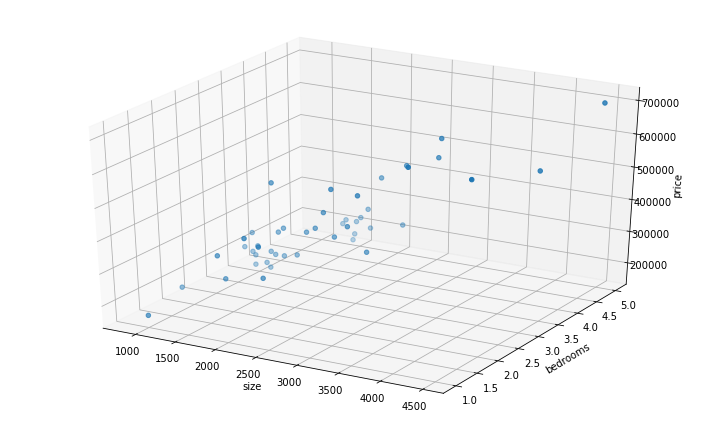

In [143]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=dataframe['size'], ys=dataframe['bedrooms'], zs=dataframe['price'])

ax.set_ylabel('bedrooms'); ax.set_xlabel('size'); ax.set_zlabel('price')
# ax.view_init(10, -45)
plt.show()

## Feature Scaling and Mean Normalization

In [144]:
dataframe.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


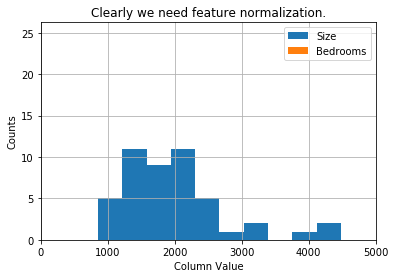

In [145]:
#Quick visualize data
plt.grid(True)
plt.xlim([-1,5000])
dummy = plt.hist(dataframe["size"],label = 'Size')
dummy = plt.hist(dataframe["bedrooms"],label = 'Bedrooms')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [146]:
mean_size   = dataframe["size"].mean()
std_size       = dataframe["size"].std()
mean_bed   = dataframe["bedrooms"].mean()
std_bed       = dataframe["bedrooms"].std()

In [147]:
dataframe["size"] = (dataframe["size"] - mean_size)/std_size


In [148]:
dataframe["bedrooms"] = (dataframe["bedrooms"] - mean_bed)/std_bed

In [149]:
dataframe.describe()

,size,bedrooms,price
count,4.700000e+01,4.700000e+01,47.000000
mean,3.779483e-17,2.746030e-16,340412.659574
std,1.000000e+00,1.000000e+00,125039.899586
min,-1.445423e+00,-2.851859e+00,169900.000000
25%,-7.155897e-01,-2.236752e-01,249900.000000
50%,-1.417900e-01,-2.236752e-01,299900.000000
75%,3.376348e-01,1.090417e+00,384450.000000
max,3.117292e+00,2.404508e+00,699900.000000


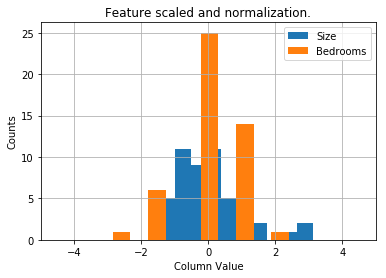

In [150]:
# reassign X
# assign X
X = np.array(dataframe[['size','bedrooms']])
X = np.insert(X,0,1,axis=1)

#Quick visualize data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(dataframe["size"],label = 'Size')
dummy = plt.hist(dataframe["bedrooms"],label = 'Bedrooms')
plt.title('Feature scaled and normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [151]:
# assign X and y
X = np.array(dataframe[['size','bedrooms']])
y = np.array(dataframe[['price']])

m = y.size # number of training examples

# insert all 1's column for theta_0
X = np.insert(X,0,1,axis=1)

# initialize theta
# initial_theta = np.zeros((X.shape[1],1))
initial_theta = np.random.rand(X.shape[1],1)

In [152]:
initial_theta

array([[ 0.71242907],
       [ 0.87930663],
       [ 0.73918403]])

In [153]:
X.shape

(47, 3)

In [154]:
initial_theta.shape

(3, 1)

## Initialize Hyper Parameters

In [155]:
iterations = 1500
alpha = 0.1

## Model/Hypothesis Function

In [156]:
def h(X, theta): #Linear hypothesis function
    hx = np.dot(X,theta)
    return hx

## Cost Function

In [157]:
def computeCost(theta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(X,theta)-y).T,(h(X,theta)-y)))

#Test that running computeCost with 0's as theta returns 65591548106.45744:
initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print (computeCost(initial_theta,X,y))

65591548106.45744


## Gradient Descent Function

In [158]:
#Actual gradient descent minimizing routine
def gradientDescent(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    j_history = [] #Used to plot cost as function of iteration
    theta_history = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        # append for plotting
        j_history.append(computeCost(theta,X,y))
        theta_history.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(X,theta) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, theta_history, j_history

## Run Gradient Descent

In [159]:
#Actually run gradient descent to get the best-fit theta values
theta, thetahistory, j_history = gradientDescent(X,initial_theta)


In [160]:
theta

array([[ 340412.65957447],
       [ 110631.05027885],
       [  -6649.47427082]])

## Plot Convergence

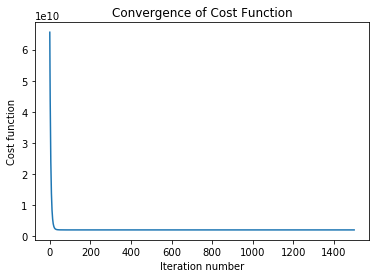

In [161]:
plt.plot(j_history)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.show()

## Predict output using trained model

In [162]:
dataframe.head()

,size,bedrooms,price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


In [166]:
x_test = np.array([1,0.130010,-0.22367])

print("$%0.2f" % float(h(x_test,theta)))

$356283.09


In [168]:
hx = h(X, theta)

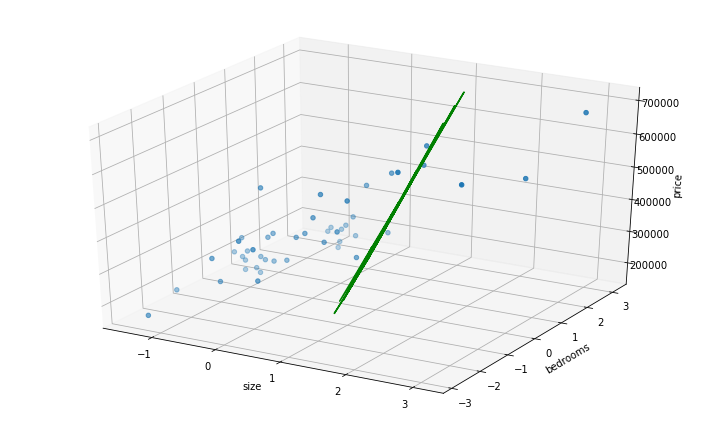

In [169]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=dataframe['size'], ys=dataframe['bedrooms'], zs=dataframe['price'])

ax.set_ylabel('bedrooms'); ax.set_xlabel('size'); ax.set_zlabel('price')
# ax.plot(xs=np.array(X[:,0],dtype=object).reshape(-1,1), ys=np.array(X[:,1],dtype=object).reshape(-1,1), zs=hx, color='green')
ax.plot(X[:,0], X[:,1], np.array(hx[:,0]), label='fitted line', color='green') 
# ax.view_init(20, -165)
plt.show()

# Resources

Course website: [https://w4zir.github.io/ml17s/](https://w4zir.github.io/ml17s/)

[Course resources](https://github.com/w4zir/ml17s)

# Credits
Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015. Print.

[Andrew Ng, Machine Learning, Coursera](#https://www.coursera.org/learn/machine-learning)

[Lucas Shen](https://github.com/icrtiou/Coursera-ML-AndrewNg)

[David Kaleko](https://github.com/kaleko/CourseraML)